In [1]:
import torch

from sbi.analysis import pairplot
from sbi.inference import NPE, simulate_for_sbi
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

In [2]:
num_dim = 2

def simulator(theta):
    # linear gaussian
    return theta[0]*theta[1] + torch.rand(1)*0.5

prior = BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))

In [3]:
# Check prior, return PyTorch prior.
prior, num_parameters, prior_returns_numpy = process_prior(prior)

# Check simulator, returns PyTorch simulator able to simulate batches.
simulator = process_simulator(simulator, prior, prior_returns_numpy)

# Consistency check after making ready for sbi.
check_sbi_inputs(simulator, prior)

In [4]:
inference = NPE(prior=prior)

In [5]:
num_simulations = 2000
theta = prior.sample((num_simulations,))
x = simulator(theta)
print("theta.shape", theta.shape)
print("x.shape", x.shape)

theta.shape torch.Size([2000, 2])
x.shape torch.Size([2000, 1])


In [6]:
inference = inference.append_simulations(theta, x)


In [7]:
density_estimator = inference.train()


 Neural network successfully converged after 213 epochs.

In [8]:
posterior = inference.build_posterior(density_estimator)

print(posterior) # prints how the posterior was trained

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [9]:
theta_true = prior.sample((1,))
# generate our observation
x_obs = simulator(theta_true)

In [10]:
x_obs

tensor([[0.5547]])

In [11]:
theta_true

tensor([[-0.8386, -0.3175]])

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

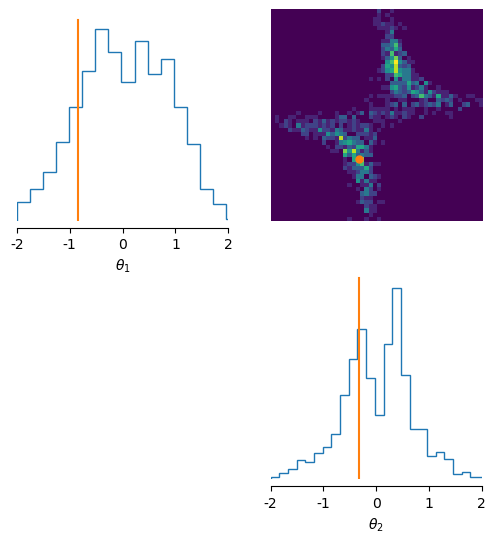

In [12]:
samples = posterior.sample((1000,), x=x_obs)
pairplot(samples,
         points=theta_true,
         limits=[[-2, 2], [-2, 2],], figsize=(6, 6),
         labels=[r"$\theta_1$", r"$\theta_2$"]);

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

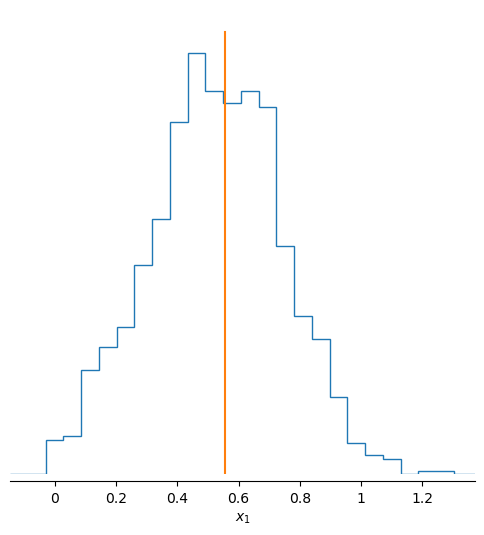

In [13]:
theta_posterior = posterior.sample((1000,), x=x_obs)  # sample from posterior
x_predictive = simulator(theta_posterior)  # simulate data from posterior
pairplot(x_predictive,
         points=x_obs,  # plot with x_obs as a point
         figsize=(6, 6),
         labels=[r"$x_1$", r"$x_2$"]);

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

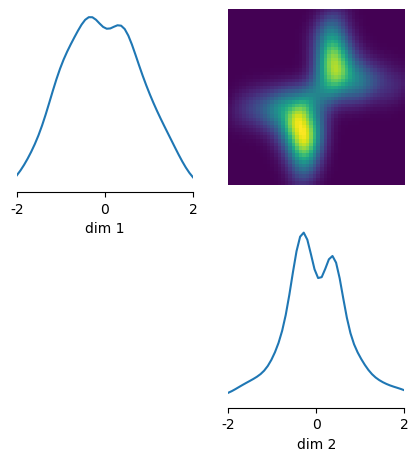

In [14]:
posterior.set_default_x(x_obs)

posterior_samples = posterior.sample((500,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2.0, 2.0]] * 2),
    upper=["kde"],
    diag=["kde"],
    figsize=(5, 5),
)

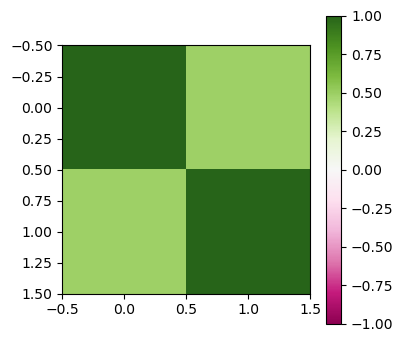

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from IPython.display import HTML
from matplotlib import animation, rc

from sbi.analysis import (
    conditional_corrcoeff,
    conditional_pairplot,
    conditional_potential,
    pairplot,
)

_ = torch.manual_seed(0)

corr_matrix_marginal = np.corrcoef(posterior_samples.T)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap="PiYG")
_ = fig.colorbar(im)

In [16]:
condition

NameError: name 'condition' is not defined

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

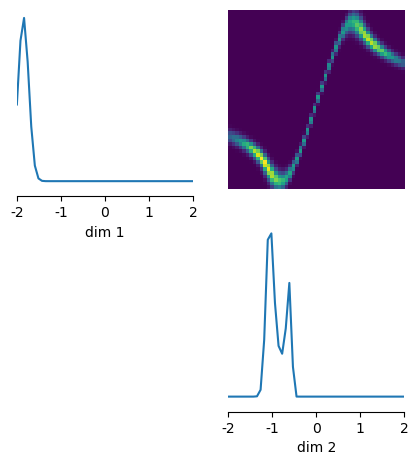

In [ ]:
condition = posterior.sample((1,))

_ = conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2.0, 2.0]] * 2),
    figsize=(5, 5),
)

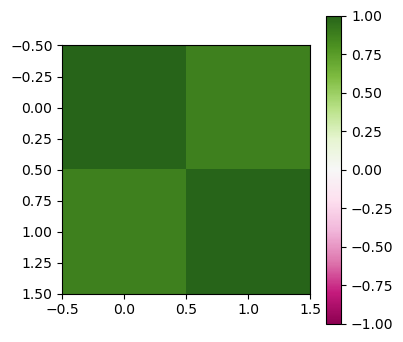

In [ ]:
cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2.0, 2.0]] * 2),
)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
im = plt.imshow(cond_coeff_mat, clim=[-1, 1], cmap="PiYG")
_ = fig.colorbar(im)

In [ ]:
num_dim = 2

def simulator(theta):
    # linear gaussian
    return [theta[0]*theta[1] + torch.rand(1)*0.5, theta[0]+theta[1] + torch.rand(1)*0.5]

prior = BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))

# Check prior, return PyTorch prior.
prior, num_parameters, prior_returns_numpy = process_prior(prior)

# Check simulator, returns PyTorch simulator able to simulate batches.
simulator = process_simulator(simulator, prior, prior_returns_numpy)

# Consistency check after making ready for sbi.
check_sbi_inputs(simulator, prior)

inference = NPE(prior=prior)
num_simulations = 2000
theta = prior.sample((num_simulations,))
x = simulator(theta)
print("theta.shape", theta.shape)
print("x.shape", x.shape)


theta.shape torch.Size([2000, 2])
x.shape torch.Size([2000, 2])


In [ ]:
inference = inference.append_simulations(theta, x)
density_estimator = inference.train()
posterior = inference.build_posterior(density_estimator)

print(posterior) # prints how the posterior was trained
theta_true = prior.sample((1,))
# generate our observation
x_obs = simulator(theta_true)
x_obs


 Neural network successfully converged after 173 epochs.Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


tensor([[0.8619, 1.9771]])

In [ ]:
theta_true

tensor([[1.2869, 0.3530]])

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

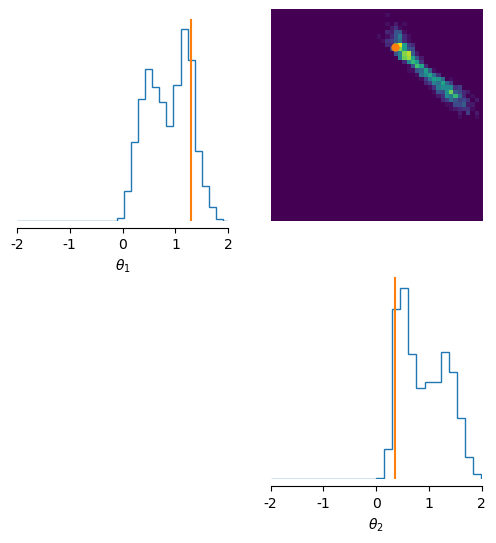

In [ ]:
samples = posterior.sample((1000,), x=x_obs)
pairplot(samples,
         points=theta_true,
         limits=[[-2, 2], [-2, 2],], figsize=(6, 6),
         labels=[r"$\theta_1$", r"$\theta_2$"]);

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

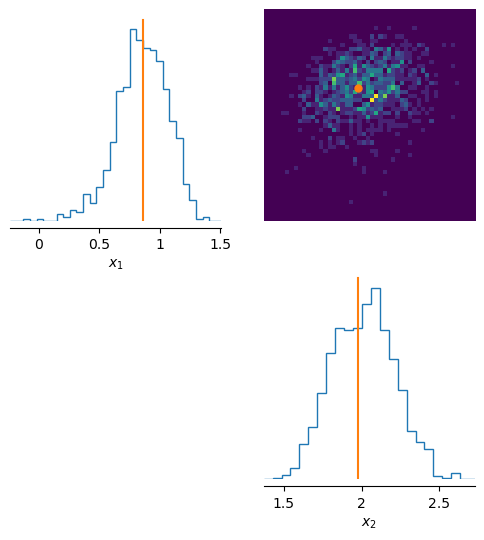

In [ ]:
theta_posterior = posterior.sample((1000,), x=x_obs)  # sample from posterior
x_predictive = simulator(theta_posterior)  # simulate data from posterior
pairplot(x_predictive,
         points=x_obs,  # plot with x_obs as a point
         figsize=(6, 6),
         labels=[r"$x_1$", r"$x_2$"]);

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

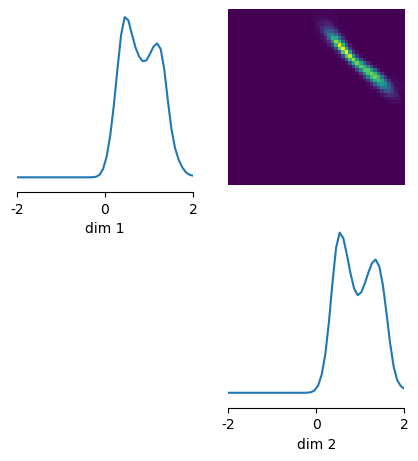

In [ ]:
posterior.set_default_x(x_obs)

posterior_samples = posterior.sample((500,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2.0, 2.0]] * 2),
    upper=["kde"],
    diag=["kde"],
    figsize=(5, 5),
)

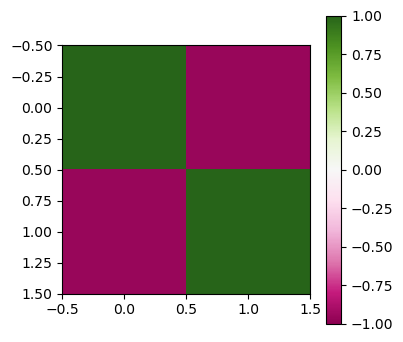

In [ ]:
corr_matrix_marginal = np.corrcoef(posterior_samples.T)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap="PiYG")
_ = fig.colorbar(im)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[0.0772, 1.5468]])


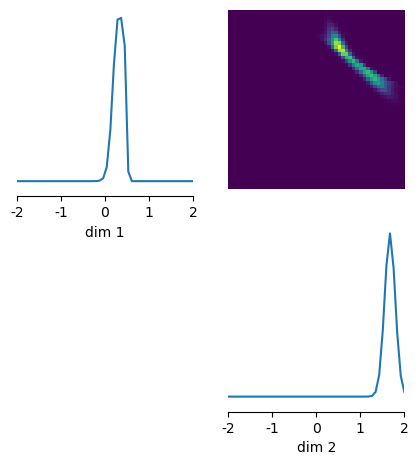

In [ ]:
condition = posterior.sample((1,))
print(condition)
_ = conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2.0, 2.0]] * 2),
    figsize=(5, 5),
)